In [49]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
rand_matrix1 = np.random.randint(255,size=(128,1))

rand_matrix1 = tf.cast(rand_matrix1,tf.float32)
encoded = Lambda(lambda x: tf.matmul(encoded,tf.Variable(rand_matrix1)))(encoded)


print rand_matrix1,encoded
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)

rand_matrix1 = tf.matrix_inverse(rand_matrix1)
print rand_matrix1,decoded
decoded = Lambda(lambda x: tf.matmul(decoded,tf.Variable(rand_matrix1)))(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Tensor("Cast_21:0", shape=(128, 1), dtype=float32) Tensor("lambda_12/MatMul:0", shape=(?, 1), dtype=float32)


ValueError: Dimensions must be equal, but are 128 and 1 for 'MatrixInverse_1' (op: 'MatrixInverse') with input shapes: [128,1].

In [41]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

32
32
32
32
32
32
32
32
32
32


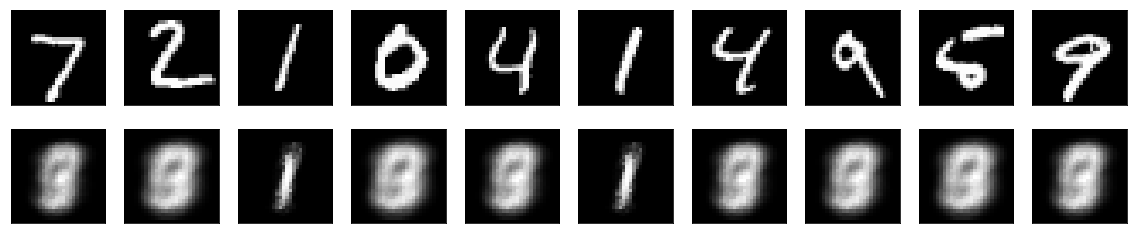

In [42]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    print encoded_imgs[i].size
    
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
